## Example of pandas reading and writing to s3 compatible storage

s3fs must be installed.

If s3fs is not installed then uncomment and run the cell below once. Comment it out again afterwards.

In [1]:
#!pip install s3fs

In [2]:
%matplotlib inline
import pandas as pd

If s3fs is available, then we can read/write to s3 just like http or local files

**Note that there are no credentials in the notebook!**
We do NOT want to include AWS Secret or Access Keys in a notebook, or any other code.

The standard way to deal with authentication with AWS is to run the ```aws configure``` command line tool on the machine where jupyter is running. The s3fs library will use that authentication.

In [3]:
df = pd.read_csv('s3://data-eng-21/datasets/CarSales.csv', parse_dates=True)
df

InvoiceDate          Make     CountryName  IsDealer  SalePrice  CostPrice  \
0    04/10/2012   Rolls Royce  United Kingdom       NaN      95000      50000   
1    01/01/2012  Aston Martin  United Kingdom       NaN     120000      75000   
2    02/02/2012   Rolls Royce  United Kingdom       NaN      88000      75000   
3    03/03/2012   Rolls Royce  United Kingdom       NaN      89000      88000   
4    04/04/2012   Rolls Royce  United Kingdom       NaN      92000      62000   
..          ...           ...             ...       ...        ...        ...   
452  23/09/2015  Aston Martin             USA       NaN      39750      27500   
453  24/10/2015  Aston Martin             USA       NaN      40440      22500   
454  25/11/2015   Rolls Royce             USA       NaN      72000      22500   
455  26/11/2015  Aston Martin             USA       NaN      40440      36125   
456  27/11/2015  Aston Martin             USA       NaN      77250      22500   

     TotalDiscount  DeliveryCharge  SpareParts  LaborCost  ...         Model  \
0            500.0             750         500        750  ...      Camargue   
1              0.0            1500         600        550  ...           DBS   
2            750.0            1000         750        550  ...  Silver Ghost   
3              0.0            1000          85        550  ...  Silver Ghost   
4              0.0            1500        2500        550  ...      Camargue   
..             ...             ...         ...        ...  ...           ...   
452         1300.0             -75         500       1250  ...           DB9   
453          550.0             175         500       1250  ...           DB9   
454         1050.0             -75         895        950  ...      Camargue   
455          800.0             875         895       1250  ...           DB9   
456          550.0             875         750       1250  ...           DB9   

             Color ReportingYear  ReportingMonth  Registration_Date  \
0              Red          2012              10         08/01/1985   
1             Blue          2012               1         09/05/2007   
2            Green          2012               2         08/09/2006   
3             Blue          2012               3         05/01/1987   
4    Canary Yellow          2012               4         08/01/1985   
..             ...           ...             ...                ...   
452          Black          2015               9         05/04/2007   
453            Red          2015              10         05/04/2003   
454           Blue          2015              11         05/04/2007   
455          Green          2015              11         05/04/2007   
456         Silver          2015              11         05/04/2003   

    VehicleType                         InvoiceNumber CountryISOCode  \
0        Saloon  8B3D7F83-F42C-4523-A737-CDCBF7705B77            GBR   
1         Coupe  139BEEEF-FF32-4BE9-9EF1-819AC888B85C            GBR   
2        Saloon  D35D72CD-5FF3-4701-A6D1-265A4F4E7CD5            GBR   
3        Saloon  2ABAA300-E2A5-4E37-BFCA-7B80ED88A2BD            GBR   
4        Saloon  A1C2D846-EC39-46FA-A399-0C194AAD4DC8            GBR   
..          ...                                   ...            ...   
452       Coupe  CF472D66-EF09-4B67-B0DB-5AD0933FF04F            USA   
453       Coupe  11924DE3-A1EA-4AAA-A2C4-56993FB0176D            USA   
454      Saloon  CBB92556-1D13-447E-98E1-B3ECCC4FB247            USA   
455       Coupe  54C176DE-35B7-4DB9-8BAE-0321704E1F97            USA   
456       Coupe  8FB171CC-016A-4C24-8DF6-22EE8FE93733            USA   

    OuterPostode                    Region  
0             ST             East Midlands  
1             EC  Greater London Authority  
2              B             West Midlands  
3             EC  Greater London Authority  
4             NE  Greater London Authority  
..           ...                       ...  
452           OH                     

In [4]:
df_aston_uk = df[ (df['Make'] == 'Aston Martin') & (df['CountryName'] == 'United Kingdom') ]

In [5]:
df_aston_uk.to_csv('s3://data-eng-21/datasets/car_sales_aston_uk.csv')

In [6]:
df_avg_per_make = df[ ['Make', 'CostPrice'] ].groupby('Make').mean()

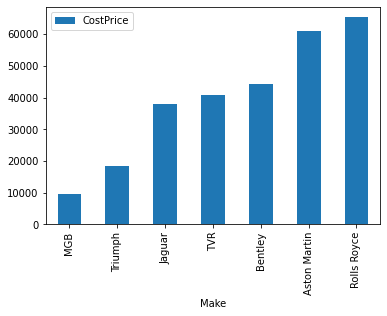

In [9]:
ax = df_avg_per_make.sort_values('CostPrice').plot(kind='bar')

In [10]:
ax.get_figure().savefig('Avg_Cost_Per_Make.png')